In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Data Set

In [2]:
import pandas as pd
salary = pd.read_csv("/content/Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Performing EDA On Data

In [3]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<Axes: xlabel='YearsExperience', ylabel='Salary'>

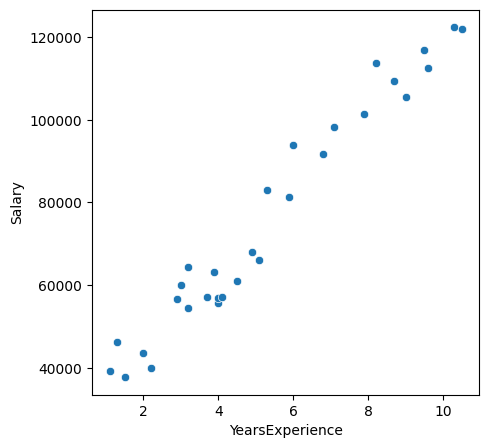

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'YearsExperience',y = 'Salary',data = salary,palette = 'Set1')

# Correlation

In [5]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Density'>

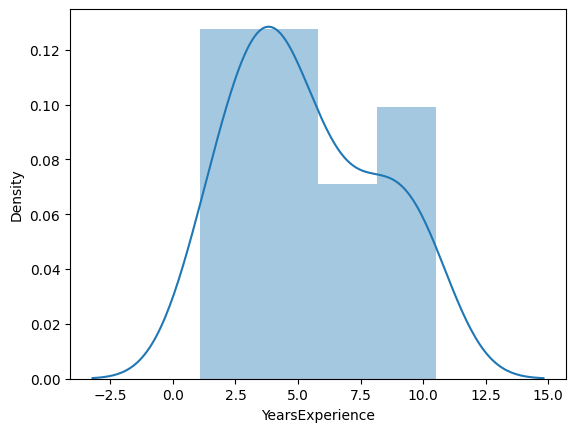

In [6]:
import seaborn as sns
sns.distplot(salary['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

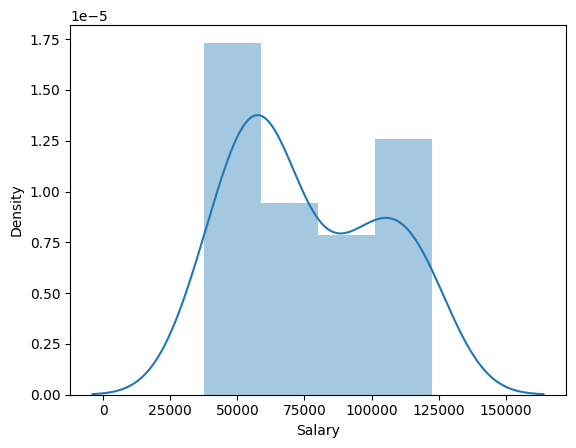

In [7]:
import seaborn as sns
sns.distplot(salary['Salary'])

Fitting a Linear Regression Model

In [8]:
import statsmodels.formula.api as smf

In [9]:
#OLS=Ordinary Least Squares
model = smf.ols("Salary~YearsExperience",data = salary).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

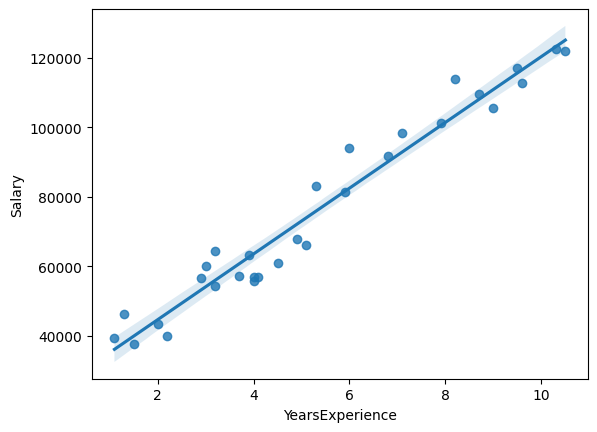

In [10]:
#To see the best fit line (which is as close as possible to as many points as possible)
sns.regplot(x="YearsExperience", y="Salary", data=salary)

In [11]:
#Coefficients
model.params

#Interpretation for Beta Coefficient of Daily
#For every unit increase in the Daily Circulation value, the value for Sunday Circulation will increase by 1.339715

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
#To see the model predictions
model.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

# y = B0 + B1*X1 + e

## B0 - Intercept
## B1 - Slope
## X1 - Independent data point
## e (error) 

Predicitng from Model without any data transformation

In [14]:
salary['Predicted']=model.fittedvalues
salary[0:5]

,YearsExperience,Salary,Predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [15]:
#To generate the residual values
#Difference between Actual & Fitted Values
salary['Error']=model.resid
salary[0:5]

,YearsExperience,Salary,Predicted,Error
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306


In [16]:
salary['Error_Sq']=(salary['Error'])**2
salary[0:5]

,YearsExperience,Salary,Predicted,Error,Error_Sq
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06
3,2.0,43525.0,44692.124842,-1167.124842,1.362180e+06
4,2.2,39891.0,46582.117306,-6691.117306,4.477105e+07


In [17]:
Mean_Squared_Error=salary['Error_Sq'].mean()
Mean_Squared_Error

31270951.72228097

In [18]:
model.rsquared
#95.6% of variation in the dependent variable is explained by the given independent variable

0.9569566641435086

Data Visualization after Transformation

In [20]:
import scipy.stats as stats
import numpy as np

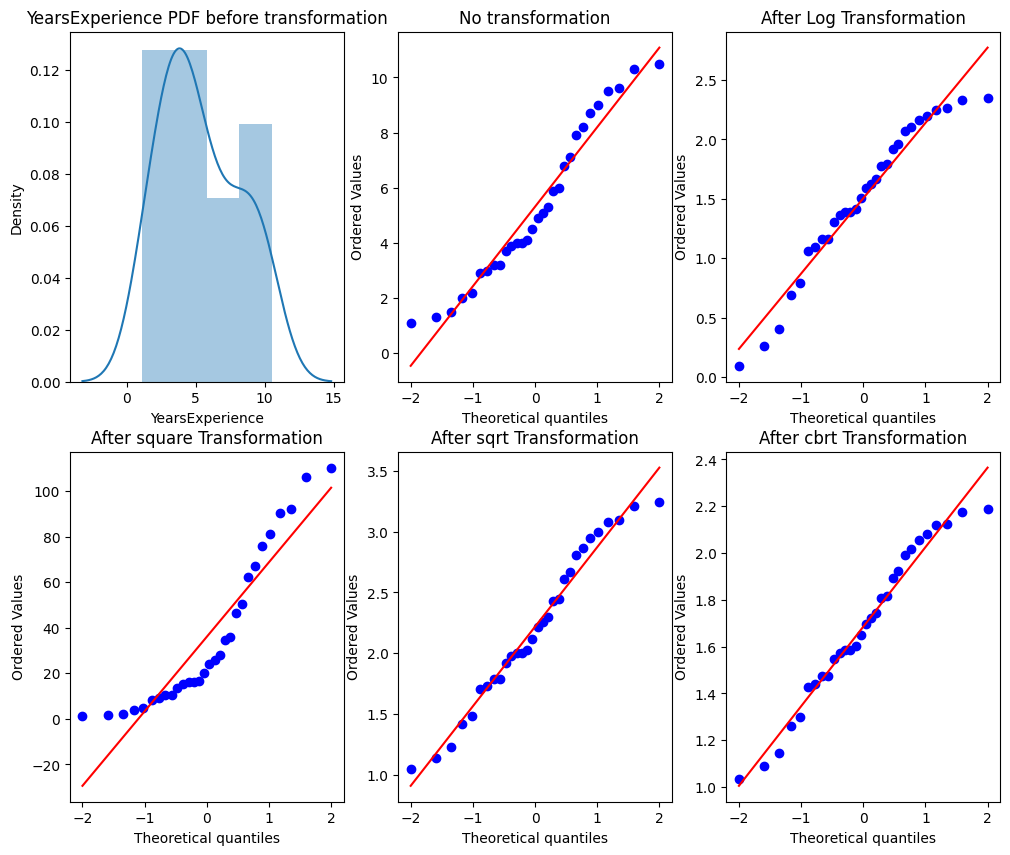

In [21]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.distplot(salary['YearsExperience'])
plt.title('YearsExperience PDF before transformation')

plt.subplot(232)
stats.probplot(salary['YearsExperience'], dist="norm", plot=plt)
plt.title('No transformation')

plt.subplot(233)
stats.probplot(np.log(salary['YearsExperience']), dist="norm", plot=plt,)
plt.title('After Log Transformation')

plt.subplot(234)
stats.probplot(np.square(salary['YearsExperience']), dist="norm", plot=plt,)
plt.title('After square Transformation')

plt.subplot(235)
stats.probplot(np.sqrt(salary['YearsExperience']), dist="norm", plot=plt,)
plt.title('After sqrt Transformation')

plt.subplot(236)
stats.probplot(np.cbrt(salary['YearsExperience']), dist="norm", plot=plt,)
plt.title('After cbrt Transformation')
plt.show()

After transforming with different method the best qqplot came for square root transformation

In [22]:
dt_new=salary.copy()
dt_new.head()

,YearsExperience,Salary,Predicted,Error,Error_Sq
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06
3,2.0,43525.0,44692.124842,-1167.124842,1.362180e+06
4,2.2,39891.0,46582.117306,-6691.117306,4.477105e+07


In [23]:
dt_new=dt_new.iloc[:,0:2]
dt_new.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [25]:
dt_new['YearsExperience']= np.sqrt(dt_new['YearsExperience'])
dt_new.head()


,YearsExperience,Salary
0,1.048809,39343.0
1,1.140175,46205.0
2,1.224745,37731.0
3,1.414214,43525.0
4,1.483240,39891.0


Building a model after log transformation

In [27]:
#OLS=Ordinary Least Squares
model = smf.ols("Salary~YearsExperience",data = dt_new).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           8.57e-18
Time:                        14:11:49   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
YearsExperience   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='YearsExperience', ylabel='Salary'>

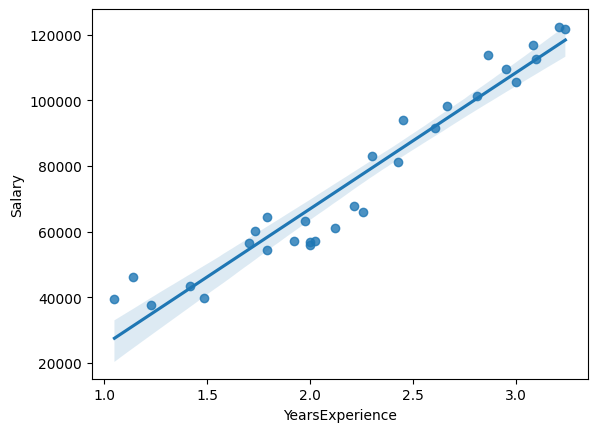

In [29]:
#To see the best fit line (which is as close as possible to as many points as possible)
sns.regplot(x="YearsExperience", y="Salary", data=dt_new)

In [30]:
#Coefficients
model.params

Intercept         -16055.769117
YearsExperience    41500.680583
dtype: float64

In [31]:
dt_new['Predicted']=model.fittedvalues
dt_new.head()

,YearsExperience,Salary,Predicted
0,1.048809,39343.0,27470.511884
1,1.140175,46205.0,31262.287009
2,1.224745,37731.0,34771.976586
3,1.414214,43525.0,42635.056211
4,1.483240,39891.0,45499.687794


In [32]:
#To generate the residual values
#Difference between Actual & Fitted Values
dt_new['Error'] = model.resid
dt_new.head()

,YearsExperience,Salary,Predicted,Error
0,1.048809,39343.0,27470.511884,11872.488116
1,1.140175,46205.0,31262.287009,14942.712991
2,1.224745,37731.0,34771.976586,2959.023414
3,1.414214,43525.0,42635.056211,889.943789
4,1.483240,39891.0,45499.687794,-5608.687794


In [33]:
dt_new['Error_Sq']=(dt_new['Error'])**2
dt_new[0:5]

,YearsExperience,Salary,Predicted,Error,Error_Sq
0,1.048809,39343.0,27470.511884,11872.488116,1.409560e+08
1,1.140175,46205.0,31262.287009,14942.712991,2.232847e+08
2,1.224745,37731.0,34771.976586,2959.023414,8.755820e+06
3,1.414214,43525.0,42635.056211,889.943789,7.919999e+05
4,1.483240,39891.0,45499.687794,-5608.687794,3.145738e+07


In [34]:
Mean_Squared_Error=dt_new['Error_Sq'].mean()
Mean_Squared_Error

50127755.61652503

In [35]:
model.rsquared

0.9310009544993526